# Introduction to OpenAI Gym
## About Gym
`Gym` is an open source Python library for developing and comparing `reinforcement learning` algorithms by providing a standard API to communicate between learning algorithms and environments, as well as a standard set of environments compliant with that API. 
* `Gym` documentation website is located [here](https://www.gymlibrary.dev/). 
* `Gym` also has a discord server for development purposes that you can join [here](https://discord.gg/nHg2JRN489).
* `Gym`'s official developer site is [here](https://github.com/openai/gym).


## Installation
* `pip install gym`

This does not include dependencies for all families of environments (there's a massive number, and some can be problematic to install on certain systems). You can install these dependencies for one family like `pip install gym[atari]` or use the following to install all dependencies.: 
* `pip install gym[all]`

If the above pip install throws a bash/zsh error, it might be the subscripts not allowed there. You need to set option for that.
* `setopt no_nomatch`

Then run again.

## The Imports

In [13]:
#!setopt no_nomatch
#!pip install gym[pong]

zsh:1: no matches found: gym[pong]


In [27]:
import gym
import math
import imageio.v2 as imageio
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from joblib import load, dump

## Listing available `gym` environments

```python
#!/Users/ashis/venv-directory/venv-ml-p3.10/bin/python3.10
#Please make this python file executable and then run it without passing it to python interpreter
#as the the interpreter listed on the first line will be invoked. Good luck!
#$ chmod +x list_all_envs_registry.py
#$ ./list_all_envs_registry.py

from gym import envs
#all_envs = envs.registry.all()
#env_ids = [env_spec.id for env_spec in all_envs]
#pprint(sorted(env_ids))
for key in envs.registry.keys():
    print(key)
```

## Interacting with the Environment
Gym implements the classic “agent-environment loop”:

<img src="https://www.gymlibrary.dev/_images/AE_loop_dark.png" style="background-color:black;" width=300>

The agent performs some `actions` in the environment (usually by passing some control inputs to the environment, e.g. torque inputs of motors) and observes how the `environment’s state` changes. One such action-observation exchange is referred to as a `timestep`.

The goal in Reinforcement Learning (RL) is to manipulate the `environment` in some specific way. 

For instance, we want the agent to navigate a robot to a specific point in space. 
* If it succeeds in doing this (or makes some progress towards that goal), it will receive a `positive reward` alongside the observation for this `timestep`. 
* The reward may also be negative or 0, if the agent did not yet succeed (or did not make any progress). 
* The agent will then be trained to maximize the reward it accumulates over many timesteps.
* After some timesteps, the environment may enter a terminal state. 
    * For instance, the robot may have crashed! In that case, we want to `reset the environment` to a new initial state. The environment issues a done signal to the agent if it enters such a terminal state. 
    * Not all done signals must be triggered by a “catastrophic failure”: Sometimes we also want to issue a done signal after a fixed number of timesteps, or if the agent has succeeded in completing some task in the environment.




## Agent-Environment loop in `Gym`
* Here below are few examples of agent-environment loop in `gym`:

### LunarLander-v2

* This example will run an instance of `LunarLander-v2` environment for `n` timesteps. 
* Since we pass `render_mode="human"`, you should see a window pop up rendering the environment.
* Save the following in a file named `lunarlanderv2.py`

```python
#!/Users/ashis/venv-directory/venv-ml-p3.10/bin/python3.10
#Please make this python file executable and then run it without passing it to python interpreter
#as the the interpreter listed on the first line will be invoked. Good luck!
#$ chmod +x lunarlanderv2.py
#$ ./lunralanderv2.py
import gym
from tqdm import tqdm

#number of timestepts
n = 500

#Since we pass render_mode="human", you should see a window pop up rendering the environment.
env = gym.make("LunarLander-v2", render_mode="human")
env.action_space.seed(42)

observation, info = env.reset(seed=42)

for _ in tqdm(range(n)):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    
    if terminated or truncated:
        observation, info = env.reset()
        #break

env.close()

```

* Every environment specifies the format of valid actions by providing an `env.action_space` attribute. 
* Similarly, the format of valid observations is specified by `env.observation_space`. 
* In the example above we sampled random actions via `env.action_space.sample()`. 
* Note that we need to seed the action space separately from the environment to ensure reproducible samples.

### ALE/Breakout-v5

* This example will run an instance of `ALE/Breakout-v5` environment for `n` timesteps. 
* Since we pass `render_mode="human"`, you should see a window pop up rendering the environment.
* Save the following in a file named `ALE-Breakout-v5_code1.py`

```python
#!/Users/ashis/venv-directory/venv-ml-p3.10/bin/python3.10
#Please make this python file executable and then run it without passing it to python interpreter
#as the the interpreter listed on the first line will be invoked. Good luck!
#$ chmod +x ALE-Breakout-v5_code1.py
#$ ./ALE-Breakout-v5_code1.py

import gym
from tqdm import tqdm

#number of timestepts
n = 500

#Since we pass render_mode="human", you should see a window pop up rendering the environment.
env = gym.make("ALE/Breakout-v5", render_mode="human")
env.action_space.seed(42)

observation, info = env.reset(seed=42)

for _ in tqdm(range(n)):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    
    if terminated or truncated:
        observation, info = env.reset()
        #break

env.close()
```

### Blackjack-v1

* This example will run an instance of `Blackjack-v1` environment for `n` timesteps. 
* Since we pass `render_mode="human"`, you should see a window pop up rendering the environment.
* Save the following in a file named `Blackjack-v1_code1.py`

```python
#!/Users/ashis/venv-directory/venv-ml-p3.10/bin/python3.10
#Please make this python file executable and then run it without passing it to python interpreter
#as the the interpreter listed on the first line will be invoked. Good luck!
#$ chmod +x Blackjack-v1-code1.py
#$ ./Blackjack-v1-code1.py
import gym
from tqdm import tqdm

#number of timestepts
n = 500

#Since we pass render_mode="human", you should see a window pop up rendering the environment.
env = gym.make("Blackjack-v1", render_mode="human")
env.action_space.seed(42)

observation, info = env.reset(seed=42)

for _ in tqdm(range(n)):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    
    if terminated or truncated:
        observation, info = env.reset()
        #break

env.close()
```

### CarRacing-v2

* This example will run an instance of `CarRacing-v2` environment for `n` timesteps. 
* Since we pass `render_mode="human"`, you should see a window pop up rendering the environment.
* Save the following in a file named `CarRacing-v2_code1.py`

```python
#!/Users/ashis/venv-directory/venv-ml-p3.10/bin/python3.10
#Please make this python file executable and then run it without passing it to python interpreter
#as the the interpreter listed on the first line will be invoked. Good luck!
#$ chmod +x CarRacing-v2-code1.py
#$ ./CarRacing-v2-code1.py
import gym
from tqdm import tqdm

#number of timestepts
n = 500

#Since we pass render_mode="human", you should see a window pop up rendering the environment.
env = gym.make("CarRacing-v2", render_mode="human")
env.action_space.seed(42)

observation, info = env.reset(seed=42)

for _ in tqdm(range(n)):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    
    if terminated or truncated:
        observation, info = env.reset()
        #break

env.close()
```

### Pong-v0

* This example will run an instance of `Pong-v0` environment for `n` timesteps. 
* Since we pass `render_mode="human"`, you should see a window pop up rendering the environment.
* Save the following in a file named `pongv0_code1.py`

```python
#!/Users/ashis/venv-directory/venv-ml-p3.10/bin/python3.10
#Please make this python file executable and then run it without passing it to python interpreter
#as the the interpreter listed on the first line will be invoked. Good luck!
#$ chmod +x pongv0_code1.py
#$ ./pongv0_code1.py

import gym
from tqdm import tqdm

#number of timestepts
n = 500

#Since we pass render_mode="human", you should see a window pop up rendering the environment.
env = gym.make("Pong-v0", render_mode="human")
env.action_space.seed(42)

observation, info = env.reset(seed=42)

for _ in tqdm(range(n)):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    
    if terminated or truncated:
        observation, info = env.reset()
        #break

env.close()
```

### Riverraid-v0

* This example will run an instance of `Riverraid-v0` environment for `n` timesteps. 
* Since we pass `render_mode="human"`, you should see a window pop up rendering the environment.
* Save the following in a file named `Riverraid-v0_code1.py`

```python
#!/Users/ashis/venv-directory/venv-ml-p3.10/bin/python3.10
#Please make this python file executable and then run it without passing it to python interpreter
#as the the interpreter listed on the first line will be invoked. Good luck!
#$ chmod +x Riverraid-v0_code1.py
#$ ./Riverraid-v0_code1.py

import gym
from tqdm import tqdm

#number of timestepts
n = 500

#Since we pass render_mode="human", you should see a window pop up rendering the environment.
env = gym.make("Riverraid-v0", render_mode="human")
env.action_space.seed(42)

observation, info = env.reset(seed=42)

for _ in tqdm(range(n)):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    
    if terminated or truncated:
        observation, info = env.reset()
        #break

env.close()

```

# Working with `Cartpole-v0` environment
* This environment is from the [classic control group](https://www.gymlibrary.dev/environments/classic_control/)
* **Goal** is to control the cart (i.e., platform) with a pole attached by its bottom prt.
* **Trick**: The pole tends to fall right or left and you would need to balance it by moving the cart to the right or left on every step.

In [16]:
env = gym.make("CartPole-v0")

/Users/ashis/venv-directory/venv-ml-p3.10/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


## State space (observable)
* The observation of the environment is 4 floating point numbers: [position of cart, velocity of cart, angle of pole, rotation rate of pole]
    1. x-coordinate of the pole's center of mass
    2. the pole's speed
    3.  the pole's angle to the cart/platform. the pole angle in radians (1 radian = 57.295 degrees)
    4. the pole's rotation rate

In [18]:
obs,info = env.reset()
print('obs = {}'.format(obs))
#Example printout:
# obs = [-0.02007766 -0.00363281 -0.0034504  -0.02222458]

obs = [ 0.04054569 -0.03567298  0.0173007   0.02051942]


## The problem is to find the `best action` per step
* We need to convert these 4 observations to into actions. 
* But, how do we learn to balance this system without knowing the exact meaning of the observed 4 numbers by getting the reward? 
* Here, the reward is 1; and it is given on every time step.
* The episode continues until the pole falls.
* To get a more accumulated reward, we need to balance the platform, as long as possible, in a way to avoid the pole falling.

In [19]:
print('env.action_space = {}'.format(env.action_space))
#Example printout:
# env.action_space = Discrete(2)
#only 2 actions: 0 or 1, where 0 means pushing the platform to the left, 1 means to the right.

env.action_space = Discrete(2)


In [20]:
print('env.observation_space = {}'.format(env.observation_space))
#Example printout:
# env.observation_space = Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
#The observation space is a 4-D space, and each dimension is as follows:
#Num Observation             Min         Max
#0   Cart Position           -2.4        2.4
#1   Cart Velocity           -Inf        Inf
#2   Pole Angle              ~ -41.8°    ~ 41.8°
#3   Pole Velocity At Tip    -Inf        Inf
#env.observation_space.low and env.observation_space.high which will print the minimum and maximum values for each observation variable.
print('env.observation_space.high = {}'.format(env.observation_space.high))
print('env.observation_space.low = {}'.format(env.observation_space.low))
#Example printout:
#env.observation_space.high = [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
#env.observation_space.low = [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]

env.observation_space = Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
env.observation_space.high = [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
env.observation_space.low = [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


## Apply a specific action at a step
* How about going left, i.e., action=0 from the action_space?
    - result is a `new state`

In [21]:
observation, reward, terminated, truncated, info = env.step(0)
print('observation = {}'.format(observation))
print('reward = {}'.format(reward))
print('terminated = {}'.format(terminated))
print('truncated = {}'.format(truncated))
print('info = {}'.format(info))
#Example printout:
#observation = [-0.02728556 -0.22667485 -0.01062018  0.3176722 ]
#reward = 1.0
#terminated = False
#truncated = False
#info = {}

observation = [ 0.03983223 -0.23103872  0.01771109  0.3186103 ]
reward = 1.0
terminated = False
truncated = False
info = {}


## Apply an random action at a step
* The `sample()` returns a random sample from the given/supplied space.
* Here below, you can see that we sample from the `action_space`.
* The `sample()` can also be used to sample from the `observation_space` as well -- although why would we want to use that here?

In [24]:
action = env.action_space.sample()
print('action = {}'.format(action))

action = 1


In [25]:
#Let's apply another random action with sampling
action = env.action_space.sample()
print('action = {}'.format(action))

action = 0


In [26]:
#Let's apply another random action with sampling
action = env.action_space.sample()
print('action = {}'.format(action))

action = 1


## Random CartPole-v0 agent

```python
#!/Users/ashis/venv-directory/venv-ml-p3.10/bin/python3.10
#Please make this python file executable and then run it without passing it to python interpreter
#as the the interpreter listed on the first line will be invoked. Good luck!
#$ chmod +x CartPole-v0-code3.py
#$ ./CartPole-v0-code3.py
import gym
from tqdm import tqdm


#The CartPole-v0 environment with a random agent
# Goal is to control the cart (i.e., platform) with a pole attached by its bottom prt.
# Trick: The pole tends to fall right or left and you would need to balance it by moving the cart to the right or left on every step.

env = gym.make("CartPole-v0",render_mode='human')

#Here below, we created the environment and initialized few variables.
total_reward = 0.0
total_steps = 0
observation, info = env.reset(seed=42)

while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    total_steps += 1

    if terminated:
        break

print('Episode terminated in {} steps\nTotal rewards accumulated = {}'.format(total_steps,total_reward))

#On average, this random agent takes 12 to 15 steps before the pole falls and the episode ends
#Most of the environments in Gym have a `reward boundary`, which is the average reward that the agent should gain during 100 consecutive eposides to solve the environment.
#For cartpole, the boundary is 195. That means, on average, the agent must hold the stick for 195 time steps or longer.
#So, our random agent's performance is extremely poor.
```

## Intelligent CartPole-v0 agent

### Discretizing continuous state space

In [28]:
def discretize_state(state, env, buckets=(1,1,6,12)):
    """    
    The problem: The original states in this game are continuous, which does not work with the basic Q-learning algorithm as it expects discrete states. By the way, a slightly advanced Q-learning strategy can work with continuous state space with the help of approximation. Let's leave that strategy out of the scope of this course! Sorry. please enroll the "AI with Reinforcement Learning" course in Spring'23 with Dr. B. Purpose of this function is to discretize the continuous state space into buckets. 

    :param state: current state's observation which needs discretizing
    :type state: 4-D float array
    :param env: the cartpole environment
    :type env: environment object returned most likely from a gym.make() call.
    :param buckets: this will be used to discretize the original continuous states in this Cartpole example, defaults to (1,1,6,12)
    :type buckets: tuple, optional
    :return: The discretized state space in the given buckets
    :rtype: tuple
    """
    ## [position of cart, velocity of cart, angle of pole, rotation rate of pole]
    ## i) x-coordinate of the pole's center of mass (i.e., cart position), unit: m
    ## ii) Cart velocity [-inf, inf], unit: m/s
    ## iii) the pole's angle to the cart/platform. the pole angle in radians (1 radian = 57.295 degrees); 
    ## iv) the pole's angular velocity [-inf, inf], unit: radian/s
    

    # Revising the upper and the lower bounds for the discretization
    # Please note: cart velocity upper and lower bounds are 3.4e38 (inf), -3.4e38 (-inf). That's a huge space!
    # Let's shrink it down to [0.5, -0.5]

    # Also note: pole's angular velocity upper and lower bounds are 3.4e38 (inf), -3.4e38 (-inf). That's also a huge space!
    # Let's shrink it down to [50 degrees/1 sec, -50 degrees/1 sec]
    
    upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50) / 1.]
    lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50) / 1.]

    # state is the native state representations produced by env
    ratios = [(state[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(state))]
    
    # state_ is discretized state representation used for Q-table later
    state_ = [int(round((buckets[i] - 1) * ratios[i])) for i in range(len(state))]
    state_ = [min(buckets[i] - 1, max(0, state_[i])) for i in range(len(state))]

    return tuple(state_) 

### Epsilon-greedy policy

In [29]:
def epsilon_greedy_policy(state, env, Q_table, exploration_rate):
    """This is an epsilon greedy policy. In other words, most of the times the agent chooses the action that maximizes the reward given state (greedily). But occassionally (controlled by the exploration_rate), the agent chooses a random action which makes sure the agent balances between exploitation and exploration

    :param state: the current state the agent is at.
    :type state: same as state
    :param env: the CartPole environment
    :type env: environment type returned perhaps from gym.make() call.
    :param Q_table: a table-like structure
    :type Q_table: same as Q_table
    :param exploration_rate: exploration rate
    :type exploration_rate: a small number close to 0.
    :return: action to be taken in the next step
    :rtype: between any value in the action_space. E.g., {0 (left), 1 (right)}
    """
    if (np.random.random() < exploration_rate):
        # Generates numbers np.random.random() uniformly between 0-1
        # This samples a random action given the environment
        return env.action_space.sample()
    else:
        # Choose greedily the action which gives the highest expected reward
        # given the current state
        return np.argmax(Q_table[state])


### Learning rate decay strategy

In [30]:
def get_rate_with_decay(t, decay_rate=25.0):
    """Get the learning rate or exploration_rate given an episode subject to decay. 
    Given the current episode number and the rate has a tendency to decrease with increasing number of episodes.

    :param t: episode number
    :type t: int
    :param decay_rate: decay rate, defaults to 25%
    :type decay_rate: float
    :return: decayed alpha value
    :rtype: float
    """
    decayed_alpha = max(0.1, min(1., 1. - np.log10((t + 1) / decay_rate)))
    return decayed_alpha

### Update Q-table (for one step)

In [31]:
def update_Q(Q_table, state, action, reward, new_state, alpha, gamma):
    """Q-learning update step.

    :param Q_table: a table-like structure with N rows for states and M columns for actions
    :type Q_table: numpy array of shape (shape(discretized_state_space),shape(action_space)). Example: (1,1,6,12,2), where (1,1,6,12) is the shape of discretized state space, and (2,) is the shape of action space.
    :param state: the current state the agent is at time step t.
    :type state: numpy array of shape(discretized_state_space)
    :param action: the action taken given the previous state at time step t
    :type action: int
    :param reward: reward collected as a result of that action at time step t
    :type reward: int
    :param new_state: the new state at time-step t+1
    :type new_state: same as state
    :param alpha: learning rate
    :type alpha: float
    :param gamma: discount factor
    :type gamma: float
    :return: updated Q_table
    :rtype: same shape of the given Q_table
    """
    Q_table[state][action] = Q_table[state][action] + alpha * (reward + gamma * np.max(Q_table[new_state]) - Q_table[state][action])
    return Q_table

### Q-learning

In [32]:
def Q_learning(env, num_episodes, gamma=0.98):
    """Training the agent with Q-learning with respect to pseudocode in Algorithm 1

    :param env: the cartpole environment
    :type env: environment object likely returned from a gym.make() call.
    :param num_episodes: the number of episodes for which to train
    :type num_episodes: int
    :param gamma: Discount factor gamma represents how much does the agent value future rewards as opposed to immediate rewards.
    :type gamma: float
    :return: The optimized Q-table
    :rtype: (dim(discretized_state_space)+dim(action_space)), e.g., (1,1,6,12,2) in CartPole-v0
    :return: A list containing the total cummulative reward for each episode of training.
    :rtype: list of length==num_episodes
    """

    # (1, 1, 6, 12) represents the discretization buckets.
    # Initialize the Q-table as full of zeros at the start.
    # Shape of Q_table would be = (1,1,6,12,  2), as there are 2 actions.
    Q_table = np.zeros((1, 1, 6, 12) + (env.action_space.n,))

    # Create a list to store the accumulated reward per each episode
    total_reward = []
    for e in tqdm(range(num_episodes)):

        # Reset the environment for a new episode, get the default state S_0
        state,info = env.reset()
        #convert the continuous state to discrete state
        state = discretize_state(state, env)

        # Adjust the alpha and the exploration rate, it is a coincidence they are the same.
        alpha = exploration_rate = get_rate_with_decay(e)
        
        # Initialize the current episode reward to 0 
        episode_reward = 0
        done = False
        while done is False:
            # Choose the action A_{t} based on the policy
            action = epsilon_greedy_policy(state, env, Q_table, exploration_rate)

            # Get the new state (S_{t+1}), reward (R_{t+1}), end signal
            new_state, reward, done, _, _ = env.step(action)
            #convert the continuous state to discrete state
            new_state = discretize_state(new_state, env)

            # Update Q-table via update_q(Q_table, S_{t}, A_{t}, R_{t+1}, S_{t+1}, alpha, gamma) 
            Q_table = update_Q(Q_table, state, action, reward, new_state, alpha, gamma)

            # Update the state S_{t} = S_{t+1}
            state = new_state
            
            # Accumulate the reward
            episode_reward += reward
        
        total_reward.append(episode_reward)
    print('Finished training!')
    return Q_table, total_reward


### Training Q-learning agent

In [34]:
#Now, let's begin train
# OpenAI Gym builds the environment for us including all the rules, dynamics etc.
env = gym.make('CartPole-v0',render_mode='rgb_array')

/Users/ashis/venv-directory/venv-ml-p3.10/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [35]:
#you can tune verbosity of cell executions
verbose = True

# How long do we want the agent to explore and learn?
num_episodes = 100

In [36]:
# Let us use Q-learning to learn best policy
Q_table, total_reward = Q_learning(env, num_episodes)

100%|██████████| 100/100 [00:00<00:00, 281.10it/s]

Finished training!


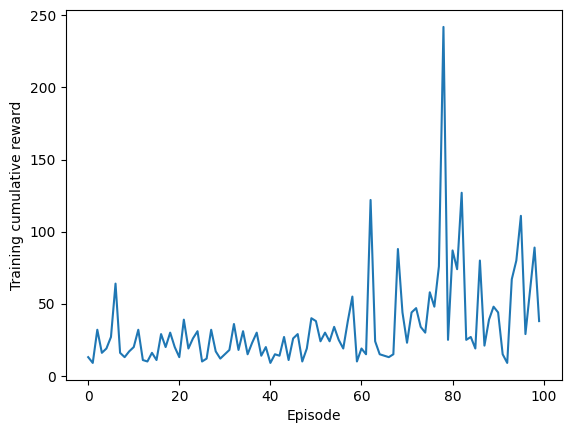

[[[[[ 0.          0.        ]
    [ 0.          0.        ]
    [ 0.          0.        ]
    [ 0.          0.        ]
    [ 0.          0.        ]
    [ 0.          0.        ]
    [ 0.          0.        ]
    [ 0.          0.        ]
    [ 0.          0.        ]
    [ 0.          0.        ]
    [ 0.          0.        ]
    [ 0.          0.        ]]

   [[24.71210507 26.97967061]
    [19.36552249 24.78297896]
    [16.2735539  26.49553617]
    [17.57212113 17.61406818]
    [ 8.21063206 24.59917008]
    [ 7.35797894 18.82634129]
    [ 1.39883516 16.38212077]
    [ 0.          5.3843517 ]
    [ 0.          0.        ]
    [ 0.          0.        ]
    [ 0.          0.        ]
    [ 0.          0.        ]]

   [[39.464254   33.35214412]
    [42.45996193 41.37632691]
    [43.30377763 39.09147226]
    [46.04908574 45.10822863]
    [46.4304456  41.16349714]
    [47.38819135 45.72096166]
    [47.45463817 44.80132441]
    [46.73390266 47.3744664 ]
    [41.03495981 47.51337862]
    [4

['joblibs/Q_table.joblib']

In [37]:
if verbose:
    #Plot
    plt.plot(range(num_episodes), total_reward)
    plt.xlabel('Episode')
    plt.ylabel('Training cumulative reward')
    plt.show()

    print(Q_table, Q_table.shape)

#Saving the Q table for later use.
dump(Q_table,'joblibs/Q_table.joblib')

In [38]:
#Don't forget to closing the gym environment
env.close()

### Evaluating Q-learning agent after training

#### The imports

In [1]:
import gym
import math
import imageio.v2 as imageio
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from joblib import load, dump

In [39]:
#Let's run one episode

max_episode_length = 400 #Duh! You wish!! It depends on how good your agent learned during training. 

# This way we can test the agent's recently learned policy with the saved Q_table
Q_table = load('joblibs/Q_table.joblib')

In [40]:
##Final test and viz. 
# Don't forget to switch to render_mode='rgb_array', otherwise env.render() will return None.
env = gym.make('CartPole-v0',render_mode='rgb_array')

In [41]:
# Initialize the reward
episode_reward = 0

# Count how many times the agent went right and how many times it went left
right = 0
left = 0

# Initialize empty buffer for the images that will be stiched to a gif
# Create a temp directory
filenames = []

In [42]:
#Create a temp directory
try:
    os.mkdir("./temp")
except:
    #print('Error: file system readonly?')
    pass

In [43]:
# Test the trained agent in a completely fresh start environment
state,info = env.reset()
# Don't forget to discretize the state_space the same way you did to train the agent
state = discretize_state(state, env)

In [44]:
# Run for maximum of max_episode_length steps which is the limit of the game
for step in tqdm(range(max_episode_length)):

    # Plot the previous state and save it as an image that 
    # will be later patched together sa a .gif
    img = plt.imshow(env.render())

    plt.title("Step: {}".format(step))
    plt.axis('off')
    plt.savefig("./temp/{}.png".format(step))
    plt.close()
    filenames.append("./temp/{}.png".format(step))
            
    # Here we set the exploration rate to 0.0 as we want to avoid any random exploration.
    # That is, we want the agent fully depends on its learned policy (+Q_table)
    action = epsilon_greedy_policy(state, env, Q_table, exploration_rate=0.0)

    #Just for statistics purpose
    right+=1 if action == 1 else 0
    left+=1 if action == 0 else 0

    #Apply the next step
    new_state, reward, done, _ , _ = env.step(action)
    #Don't forget to discretize new_state
    new_state = discretize_state(new_state, env)
    state = new_state

    #Collect/accumulate reward
    episode_reward += reward

    # At the end of the episode print the total reward, 
    # only the agent is done before the set max_episode_length steps.
    # If your agent was trained well, who knows, the following would never happen! Haha
    if done:
        print(f'Test episode finished at step {step+1} with a total reward of: {episode_reward}')
        print(f'We moved {right} times right and {left} times left')
        break

 10%|█         | 42/400 [00:07<01:05,  5.45it/s]

Test episode finished at step 43 with a total reward of: 43.0
We moved 22 times right and 21 times left


In [45]:
# Stitch the images together to produce a .gif
with imageio.get_writer('./video/test.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

In [46]:
# Cleanup the images for the next run
for f in filenames:
    os.remove(f)

In [47]:
# Close the environment
env.close()

: 